<a href="https://colab.research.google.com/github/AadityaSukhoi/Pima-Indians-Diabetes-Dataset-ANN/blob/main/Pima-Indians-Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Title:** End-to-End ANN Model Implementation and Analysis
Instructions:

1. Follow the tasks step by step in this notebook.

2. Write your code in the provided cells only.

3. Submit the following:

      Completed .ipynb file

**A report (.pdf or .docx) with answers to the analysis questions provided at the end.**

In [ ]:
from google.colab import files

# Upload kaggle.json
_ = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
!mkdir -p ~/.kaggle # Create a hidden kaggle directory
!mv kaggle.json ~/.kaggle/ # Move kaggle.json here
!chmod 600 ~/.kaggle/kaggle.json # Set proper permissions

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 40.1MB/s]


In [ ]:
!unzip -q pima-indians-diabetes-database.zip -d indians-diabetes-dataset

In [ ]:
!ls

indians-diabetes-dataset  pima-indians-diabetes-database.zip  sample_data


In [ ]:
import os

image_path = "indians-diabetes-dataset"
subfolders = os.listdir(image_path)

print("Subfolders found: ", subfolders)

Subfolders found:  ['diabetes.csv']


✅ Task 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

✅ Task 2: Load Dataset (Use from sklearn.datasets or any open dataset)

In [ ]:
df = pd.read_csv('indians-diabetes-dataset/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


✅ Task 3: Perform Exploratory Data Analysis (EDA)
1. Show basic info (shape, columns, datatypes)
2. Describe data
3. Use visualizations (histograms, boxplots, heatmaps, pairplots etc.)

Identify class imbalance if any

In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

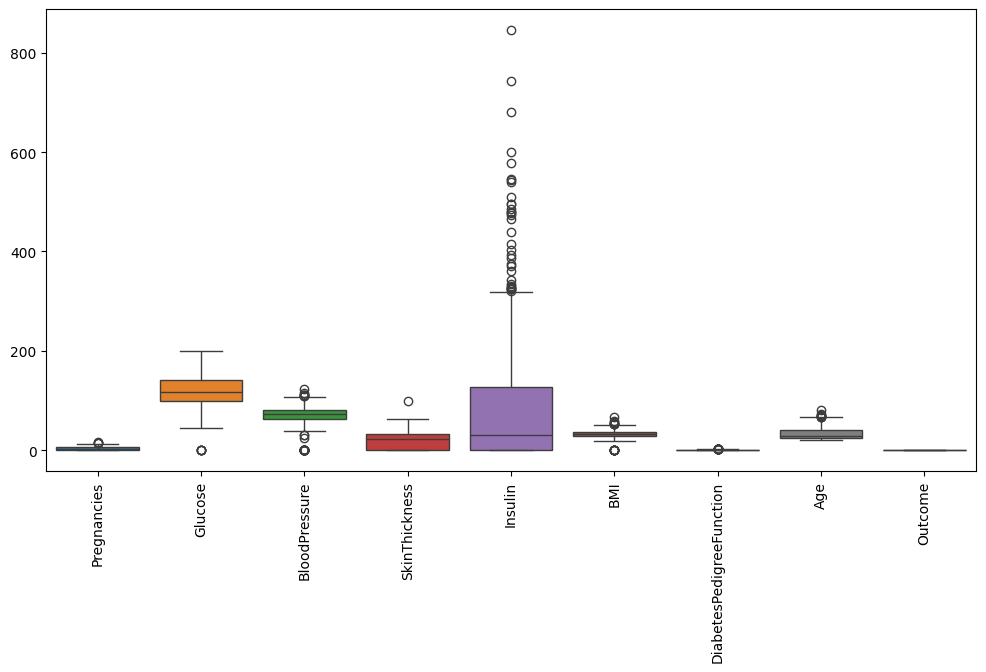

In [ ]:
# Handling Outliers using Boxplot (visualization)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Remove outliers from all numerical columns using IQR method

def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

    return df[condition]

df_no_outliers = remove_outliers_iqr(df)

print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers.shape}")

Original shape: (768, 9)
Shape after outlier removal: (639, 9)


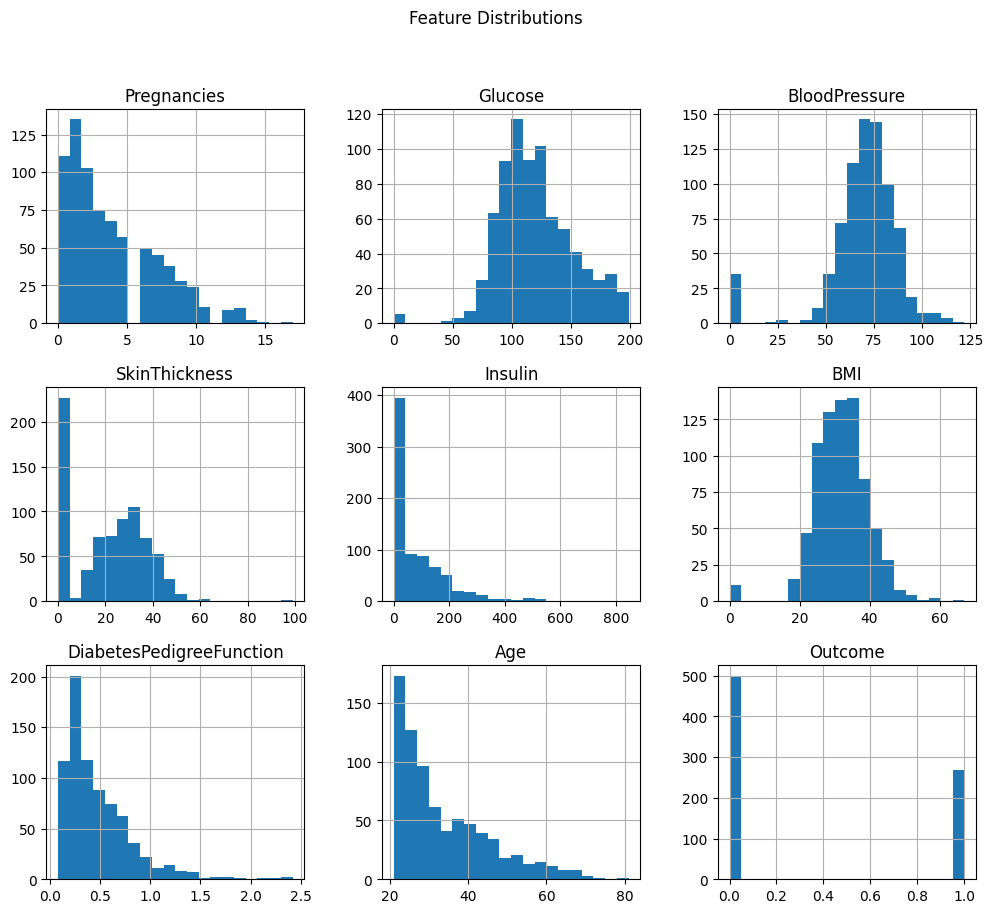

In [ ]:
# Histogram for each feature
df.hist(bins=20, figsize=(12,10))
plt.suptitle('Feature Distributions')
plt.show()

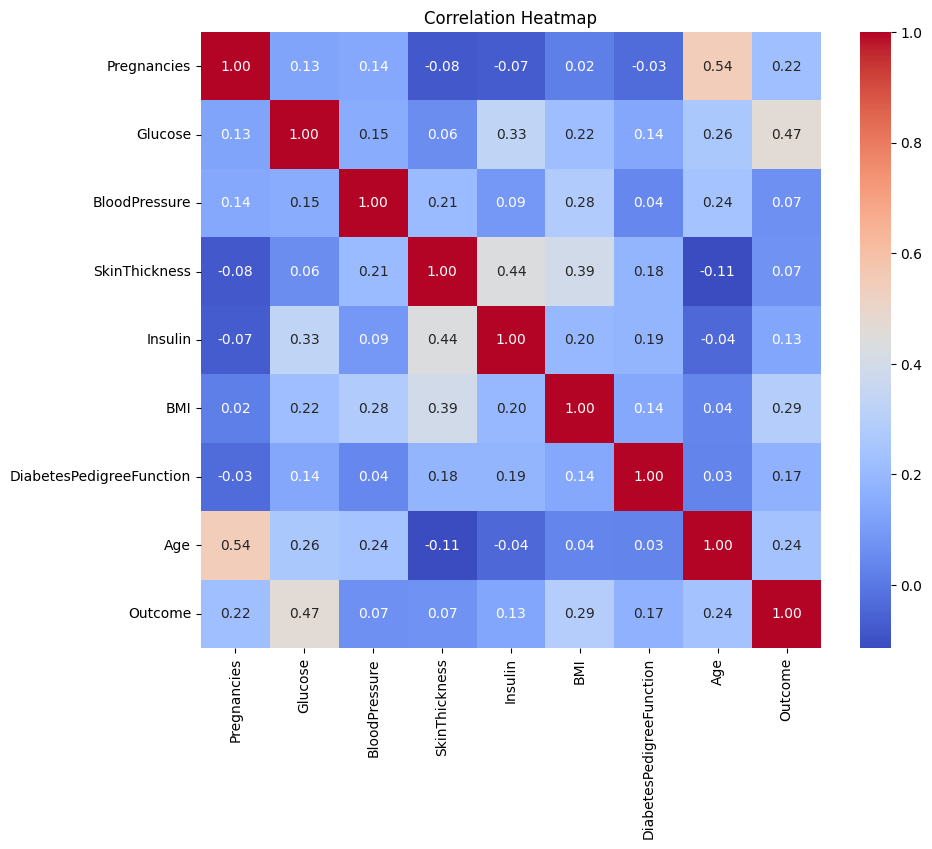

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

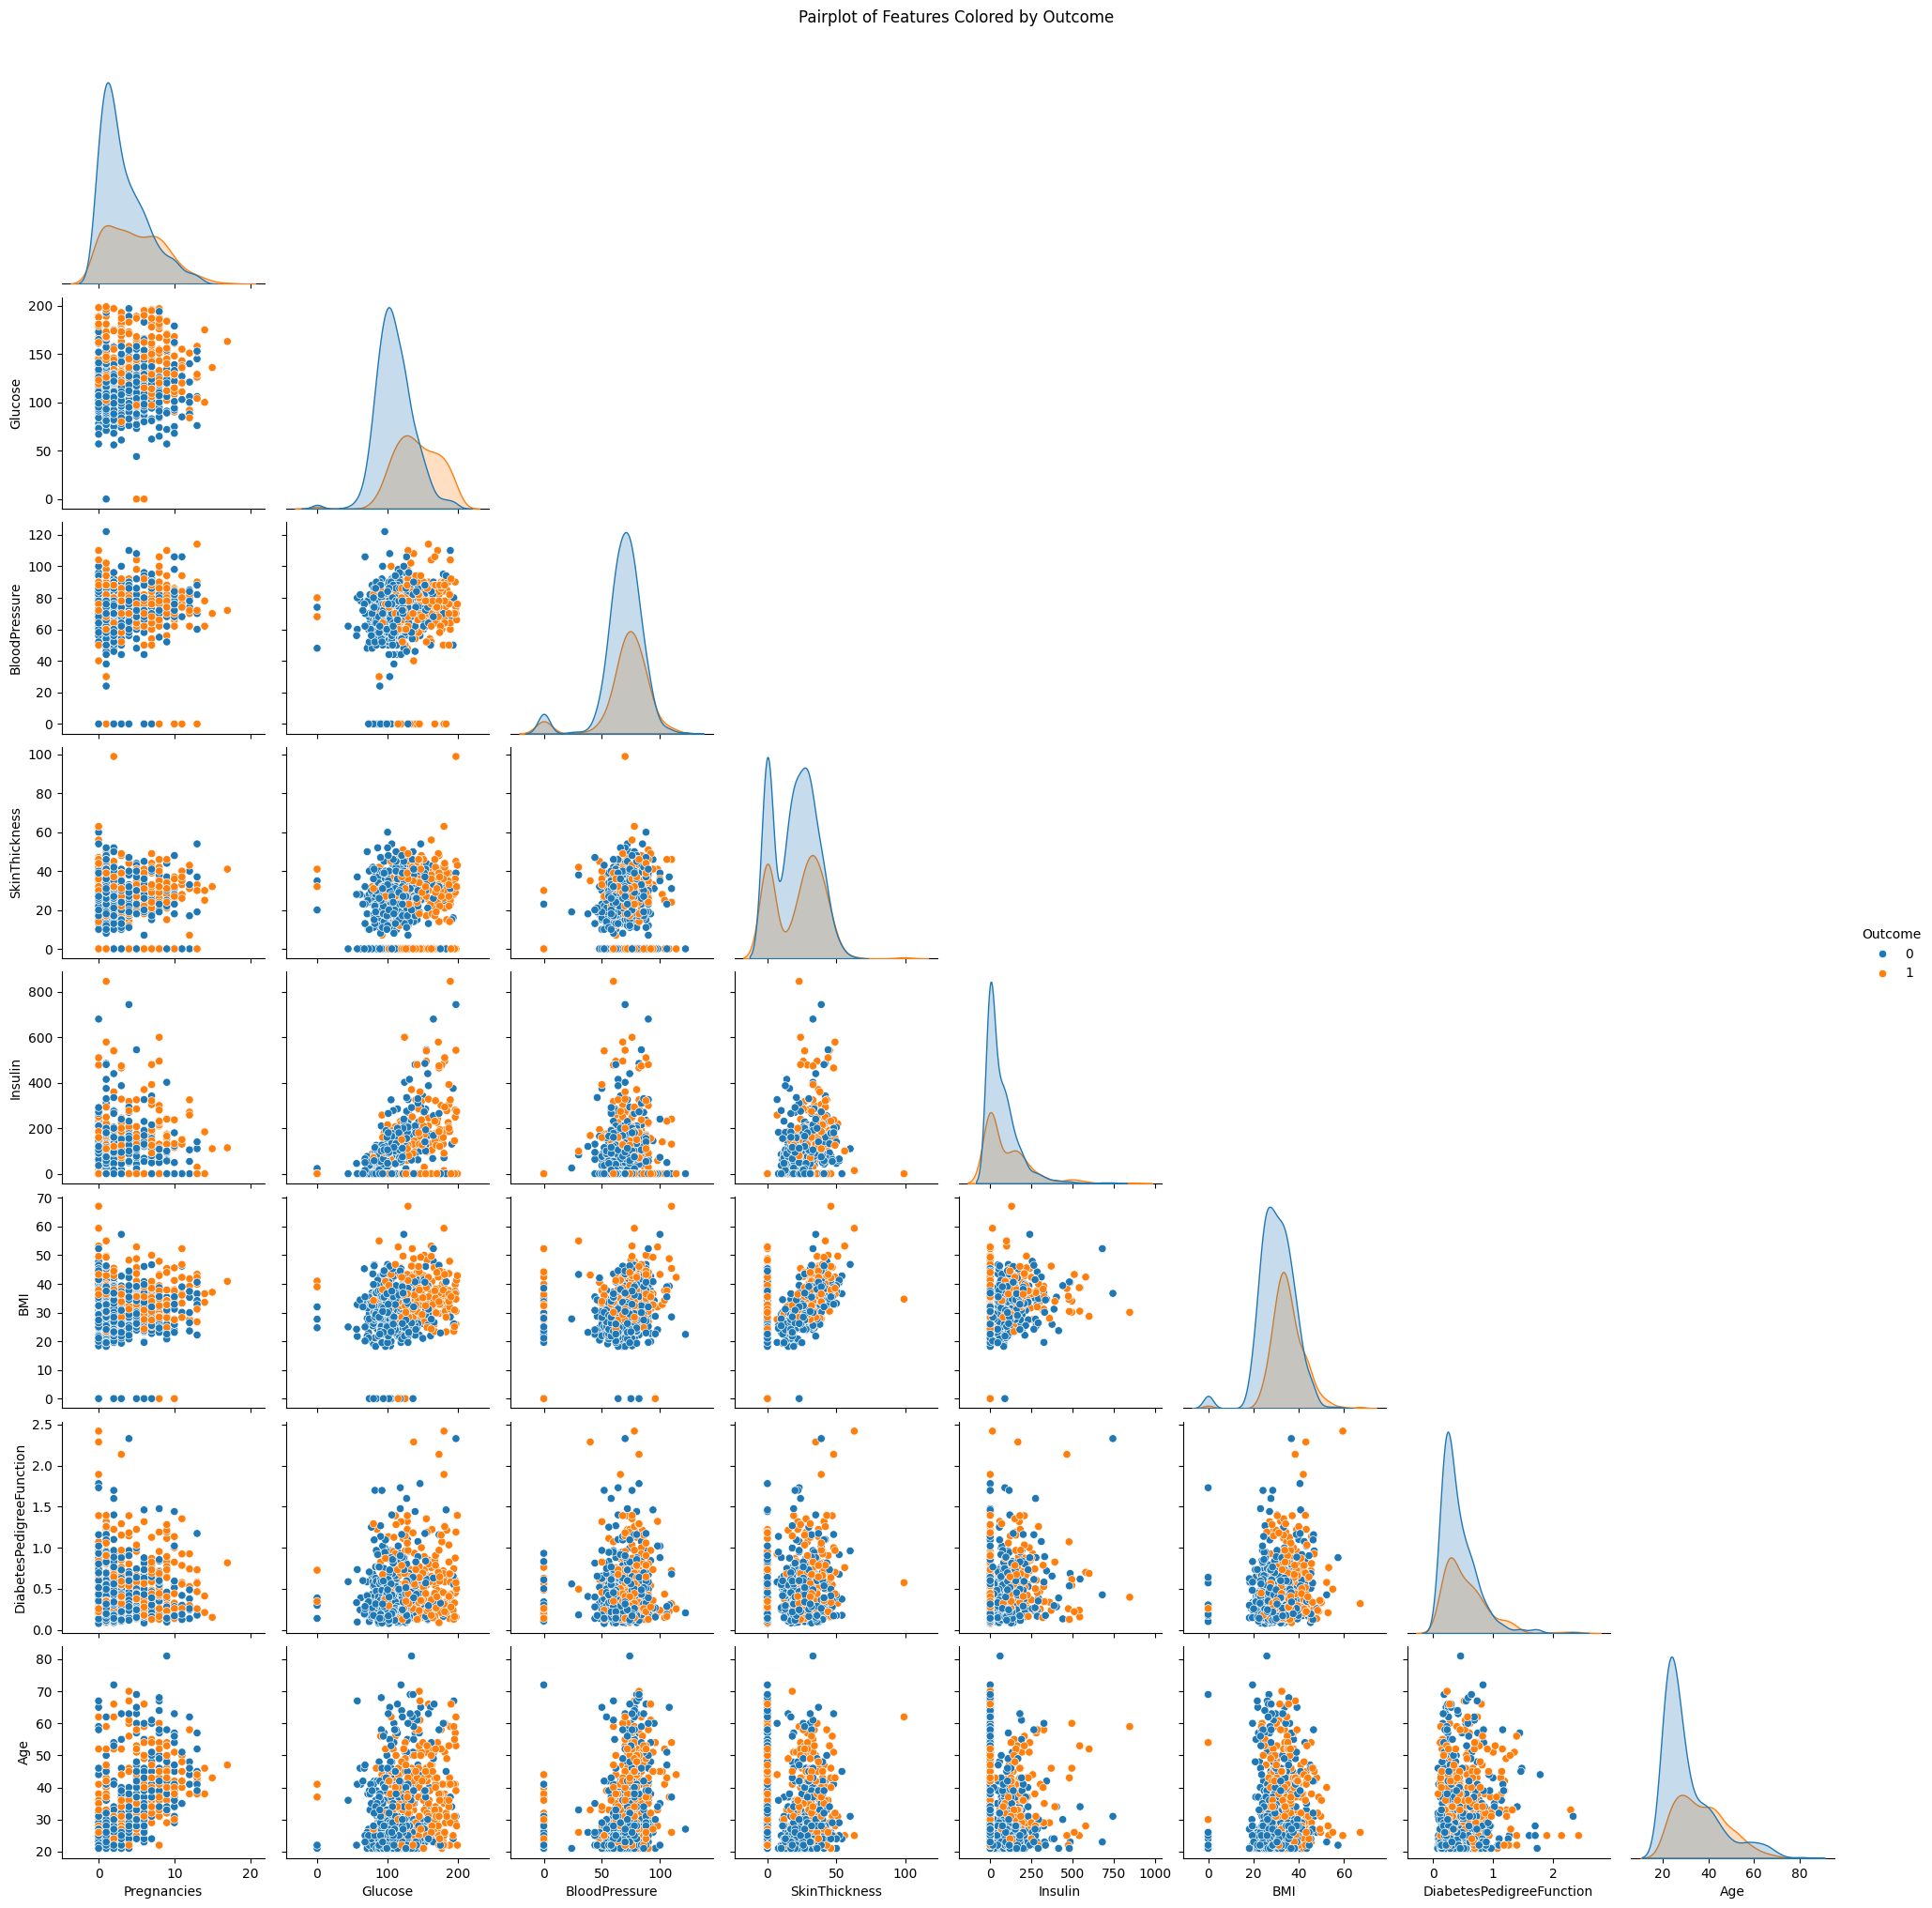

In [ ]:
# Pairplot
sns.pairplot(df, hue='Outcome', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Features Colored by Outcome', y=1.02)
plt.show()

✅ Task 4: Feature Engineering
1. Handle missing values if any
2. Encode categorical variables if any
3. Create or remove irrelevant features

In [ ]:
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

In [ ]:
# Impute NaN with median
for col in invalid_zero_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [ ]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



✅ Task 5: Feature Scaling / Normalization
1. StandardScaler / MinMaxScaler

In [ ]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Applying StandardScaler
scaler = StandardScaler()
X_scaled_std = scaler.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled_std, columns=X.columns)

In [ ]:
print("Feature scaling done:")
print(X_scaled.head())

Feature scaling done:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


✅ Task 6: Split Data into Training and Testing Sets (80/20 or 70/30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
y_train.shape

(614,)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
y_test.shape

(154,)


✅ Task 7: Define the ANN Model (Sequential API - Keras)
1. Design architecture (input, hidden, output layers)
2. Use appropriate activation functions




In [ ]:
# Define the model
model = Sequential([
    Dense(12, input_dim=8, activation='relu'),  # input layer + first hidden layer
    Dense(8, activation='relu'),                 # second hidden layer
    Dense(1, activation='sigmoid')               # output layer
])

✅ Task 8: Compile the Model
* Select optimizer, loss function, and evaluation metrics

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

✅ Task 9: Train the Model
* Use model.fit()
* Track performance using training history

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5722 - loss: 0.6771 - val_accuracy: 0.6748 - val_loss: 0.6393
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6610 - loss: 0.6425 - val_accuracy: 0.6829 - val_loss: 0.6155
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6937 - loss: 0.6137 - val_accuracy: 0.6911 - val_loss: 0.5943
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6471 - loss: 0.6121 - val_accuracy: 0.6992 - val_loss: 0.5764
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7002 - loss: 0.5724 - val_accuracy: 0.7073 - val_loss: 0.5589
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6687 - loss: 0.5715 - val_accuracy: 0.7154 - val_loss: 0.5429
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7008 - loss: 0.5263 - val_accuracy: 0.7154 - val_loss: 0.5290
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6852 - loss: 0.5382 - val_accuracy: 0.7480 - val_loss

✅ Task 10: Visualize Model Performance
* Plot loss and accuracy curves for training and validation

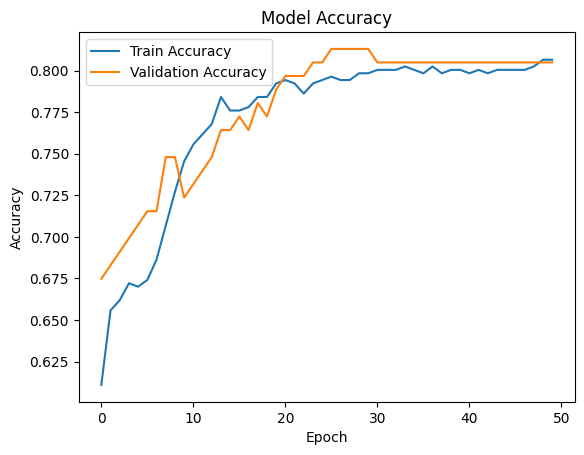

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

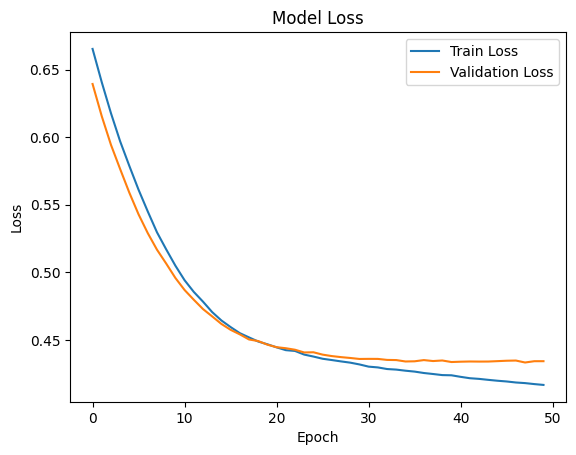

In [ ]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

✅ Task 11: Evaluate Model on Test Data
* Accuracy, loss
* Predict test set

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
test_loss

0.4867740869522095

In [ ]:
test_accuracy

0.7207792401313782

In [ ]:
# Predict classes (probabilities to class labels 0 or 1)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
print("\nFirst 10 predictions vs actual:")
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")


First 10 predictions vs actual:
Predicted: 1, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 0


✅ Task 12: Confusion Matrix and Classification Report
* Use sklearn metrics to analyze performance

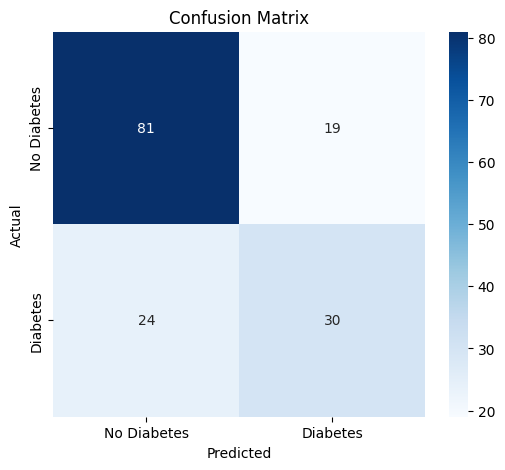

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.77      0.81      0.79       100
    Diabetes       0.61      0.56      0.58        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154



✅ Task 13: Hyperparameter Tuning (Try any of the following)
* Vary batch size, epochs, optimizers
* Use Keras Tuner or manual tuning

In [ ]:
from tensorflow.keras.optimizers import Adam
EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 0.0005
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)

In [ ]:
# Define model
model = Sequential([
    Dense(12, activation='relu', input_shape=(8,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3361 - loss: 0.7799 - val_accuracy: 0.3442 - val_loss: 0.7626
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3972 - loss: 0.7362 - val_accuracy: 0.4156 - val_loss: 0.7394
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4559 - loss: 0.7157 - val_accuracy: 0.4935 - val_loss: 0.7194
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4905 - loss: 0.7018 - val_accuracy: 0.5325 - val_loss: 0.7020
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5472 - loss: 0.6857 - val_accuracy: 0.5779 - val_loss: 0.6860
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5687 - loss: 0.6821 - val_accuracy: 0.6104 - val_loss: 0.6711
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6280 - loss: 0.6603 - val_accuracy: 0.6364 - val_loss: 0.6572
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6494 - loss: 0.6418 - val_accuracy: 0.6494 - 

In [ ]:
test_accuracy

0.7207792401313782

In [ ]:
test_loss

0.4867740869522095

✅ Task 14: Save and Load the Model (Optional)

In [ ]:
# Save in HDF5 format
model.save("diabetes_ann_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

# Load model
loaded_model = load_model("diabetes_ann_model.h5")
print("Model loaded successfully!")

# Evaluate loaded model (just to confirm it works)
loss, accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded Model Accuracy: {accuracy:.4f}")

Model loaded successfully!
Loaded Model Accuracy: 0.7143


📄 Report Questions (To be submitted separately)
* Dataset Selection: What dataset did you choose? Describe its purpose and target.
* EDA Findings: What key insights did you gain during EDA?
* Feature Engineering: What transformations did you apply? Why?
* ANN Architecture: List number of layers, neurons, activation functions.
* Performance Summary: What were the final accuracy and loss?
* Confusion Matrix Analysis: What did it reveal about model behavior?
* Hyperparameter Tuning: What parameters did you change and what was the result?
* Improvement Ideas: Suggest one way to improve performance.
* Overfitting/Underfitting: Did you face it? How did you address it?

